# Creating and saving a single task dataset from predefined tasks

### Imports

In [1]:
import sys
sys.path.append('../')

In [2]:
from cognitive import constants as const
from cognitive.auto_task.auto_task_util import write_trial_instance
from cognitive.task_bank import CompareLocTemporal, CompareCategoryTemporal, SequentialCategoryMatch
import os
import shutil
import glob
import json

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Constant Definitions

- Here we define the constants for the task

In [3]:
output_dir = 'outputs/trials' # '../datasets/test_mini' # the output directory
stim_dir = '/home/lucas/XLshared_large_files/shapenet_handpicked_val' # '../data/shapenet_handpicked_val'
n_tasks = 10000 # number of tasks to be generated
const.DATA = const.Data(dir_path=stim_dir, train=False)#, max_memory=3)


# Create the output directory
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

- Generate the tasks and write them to the output directory
- (remember to specify 'train' parameter of write function)

In [4]:
import time

times = []
    
for i in range(n_tasks):

    # Choose a task class (see task_bank or make your own see individual_task_gen.ipynb)
    task = CompareCategoryTemporal(whens=['last2','last0'])

    # Write trial to disk
    fp = os.path.join(output_dir, 'trial' + str(i))

    # Start the timer
    start = time.time()
    write_trial_instance(task, fp, 224, True, train=True)
    end = time.time()
    times.append(end-start)
    print('time: ', end-start)

# print statistics
print('Average time: ', sum(times)/len(times))
print('Max time: ', max(times))
print('Min time: ', min(times))

time:  0.015172243118286133
time:  0.004579067230224609
time:  0.004889965057373047
time:  0.0040395259857177734
time:  0.004359006881713867
time:  0.0037147998809814453
time:  0.00408482551574707
time:  0.0037436485290527344
time:  0.0037097930908203125
time:  0.0039234161376953125
time:  0.0041294097900390625
time:  0.0036776065826416016
time:  0.004076242446899414
time:  0.00394129753112793
time:  0.0040569305419921875
time:  0.004177570343017578
time:  0.003530740737915039
time:  0.004304409027099609
time:  0.0039463043212890625
time:  0.0041081905364990234
time:  0.003636598587036133
time:  0.004282236099243164
time:  0.0038166046142578125
time:  0.004067420959472656
time:  0.003931999206542969
time:  0.0037412643432617188
time:  0.00397181510925293
time:  0.0040891170501708984
time:  0.0041332244873046875
time:  0.004073381423950195
time:  0.004040718078613281
time:  0.003973722457885742
time:  0.004193305969238281
time:  0.0036787986755371094
time:  0.0040400028228759766
time:  

Regular Pillow Times (10k)
- Average time:  0.00742887408733368
- Max time:  0.10497045516967773
- Min time:  0.006044864654541016

Optimized Pillow Times (10k)
- Average time:  0.00705133376121521
- Max time:  0.17676377296447754
- Min time:  0.005532264709472656

opencv Times (10k)
- Average time:  0.004451341485977173
- Max time:  0.09650158882141113
- Min time:  0.003529071807861328

instruction  observe object 1, delay, observe object 2, category of object 1 equals category of object 2?
answers:  ['null', 'null', 'true']


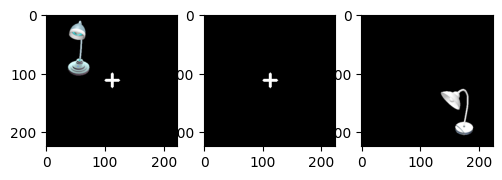

In [5]:
images = []
for img_path in sorted(glob.glob('outputs/trials/trial0/*.png')):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.imshow(image)
with open('outputs/trials/trial0/trial_info') as f:
    trial_info = json.load(f)
print('instruction ', trial_info['instruction'])
print('answers: ', trial_info['answers'])

In [6]:
# display trial frame sequence
images = []
for img_path in sorted(glob.glob('../datasets/test_mini/trial0/*.png')):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(images):
    plt.subplot(len(images) // columns + 1, columns, i + 1)
    plt.imshow(image)
with open('../datasets/test_mini/trial0/trial_info') as f:
    trial_info = json.load(f)
print('instruction ', trial_info['instruction'])
print('answers: ', trial_info['answers'])

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/test_mini/trial0/trial_info'

<Figure size 2000x1000 with 0 Axes>